In [1]:
import pandas as pd

In [2]:
emotion = pd.read_csv("../../Data/Bayes_ballad2000_emotion3.csv")
emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   가수명     1913 non-null   object
 1   노래제목    1913 non-null   object
 2   발매일     1913 non-null   object
 3   가사      1913 non-null   object
 4   좋아요수    1913 non-null   object
 5   앨범사진    1913 non-null   object
 6   songId  1913 non-null   int64 
 7   순위      1913 non-null   int64 
 8   감정      1913 non-null   object
dtypes: int64(2), object(7)
memory usage: 134.6+ KB


In [3]:
emotion_lyrics = emotion[['가사','감정']]

In [4]:
emotion_lyrics

,가사,감정
0,잘 지냈지? 조금은 어색해 요즘 좋아 보여 인사 나누며 사실 궁금한 게 너무 많았...,sad
1,우리 다시 만날래 예쁘게 빛나던 모든 추억들이 너무 그리워 너의 품에 안길래 이 ...,sad
2,사랑이었다 별거 없던 내 하루에 빛이 돼준 단한 사람 나보다 나를 더 아껴 주던 ...,sad
3,뭐하고 있었니 늦었지만 잠시 나올래 너의 집 골목에 있는 놀이터에 앉아 있어 친구...,sad
4,잊지는 말아요 함께 했던 날들 눈물이 날 때면 그대 뒤를 돌아보면 돼요 아프지 말...,indifference
...,...,...
1908,겨울 오면은 우리 둘이서 항상 왔었던 바닷가 시린 바람과 하얀 파도는 예전 그대로였...,sad
1909,좋은 사람 만나 행복해야 해 너는 웃고 있지만 나는 웃을 수가 없는걸 그래 난 알고...,sad
1910,그때의 나는 너를 만나서 하나부터 열까지 모든 순간들이 소중했어 내 첫사랑 잊고 싶...,sad
1911,다시 처음으로 돌아갈 수 있다면 아마 너를 사랑하는 일은 안했을텐데 그 날밤 그 카...,sad


In [5]:
emotion_lyrics.감정.value_counts()

sad             1485
happy            255
indifference     173
Name: 감정, dtype: int64

---
### 비율 170개로 동일하게 맞춰주기

In [6]:
import numpy as np

In [7]:
sad = emotion_lyrics[emotion_lyrics.감정 == 'sad']

In [8]:
sad= sad.sample(n=170,replace=True)

In [9]:
sad.reset_index(drop=True,inplace=True)

In [10]:
happy = emotion_lyrics[emotion_lyrics.감정 == 'happy']

In [11]:
happy = happy.sample(n=170,replace=True)

In [12]:
happy.reset_index(drop=True,inplace=True)

In [13]:
indifference = emotion_lyrics[emotion_lyrics.감정 == 'indifference']

In [14]:
indifference= indifference.sample(n=170,replace=True)

In [15]:
indifference.reset_index(drop=True,inplace=True)

In [16]:
emotion_lyrics=pd.concat([happy,sad,indifference],axis=0)

In [17]:
emotion_lyrics.reset_index(drop=True,inplace=True)

In [18]:
emotion_lyrics.감정.value_counts()

happy           170
sad             170
indifference    170
Name: 감정, dtype: int64

In [20]:
emotion_lyrics.to_csv("../../Data/lstm_170.csv", index=None)

------

In [24]:
emotion_lyrics_happy = emotion_lyrics[emotion_lyrics['감정']=='happy'].reset_index(drop=True)
emotion_lyrics_sad = emotion_lyrics[emotion_lyrics['감정']=='sad'].reset_index(drop=True)
emotion_lyrics_indifference = emotion_lyrics[emotion_lyrics['감정']=='indifference'].reset_index(drop=True)

In [164]:
results = set()
emotion_lyrics.가사.str.split().apply(results.update)
vocab_size = len(results)
vocab_size

12934

In [165]:
lyrics = emotion_lyrics.가사.to_list()
lyrics[0:5]

['Can you hear the crystal melody with a small hint of misery Life sometimes promises warmth tomorrow Just like a dusky sunset in splendor I remember the humming sound is passing by The tears we have held back all the dreams that I have lost in the Precious days Just keep on dreaming and dreaming alone in the faded paradise your heart that is lighting up the world Takes me to the beautiful dawn Can you see the place I used to stay waiting for you to call me Life sometimes becomes a shining starlight gazing at you make my heart more flutter Just keep on dreaming and dreaming don’t you fold your wings in doubt Each piece of precious memory They will make you fly away I will be there in your memory sweet sweet dreams my dear ',
 ' 그대의 눈물이 마를 때까지 우리의 사랑을 볼 수 없을테니 울지 말아요 이제야 나는 알겠으니 날 사랑하던 그대는 이미 없다는걸 so you don`t cry for me 세월 지나도 난 변하지 않아 and then I cry for you 이 밤 지나면 이젠 안녕 영원히 그대의 아픔도 눈물도 슬픈 상처도 내가 갖겠다던 약속들 잊지 않았기에 울지 말아요 이토록 사랑하기에 이젠 안녕 천천히 그리고 영원히 so you don`t cry for me 세월 지나도 난 변하지 

In [166]:
train_length = emotion_lyrics.가사.astype(str).apply(len)
train_length.head()

0     730
1     525
2     439
3     645
4    1273
Name: 가사, dtype: int64

In [167]:
import matplotlib.pyplot as plt

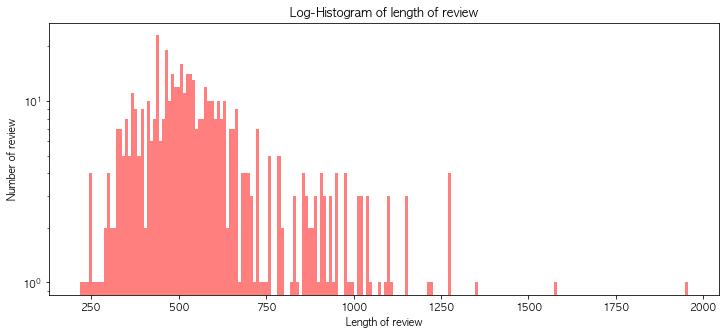

In [168]:
# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
# 히스토그램 선언
# bins : 히스토그램 값에 대한 버킷 범위
# range : x축 값의 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label : 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log',nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review')
plt.show()

In [169]:
import numpy as np

In [170]:
print('길이 최대값: {}'.format(np.max(train_length)))
print('길이 최대값: {}'.format(np.min(train_length)))
print('길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('길이 중간값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

길이 최대값: 1957
길이 최대값: 217
길이 평균값: 577.45
길이 표준편차: 216.11
길이 중간값: 527.5
길이 제1사분위: 442.0
길이 제3사분위: 647.0


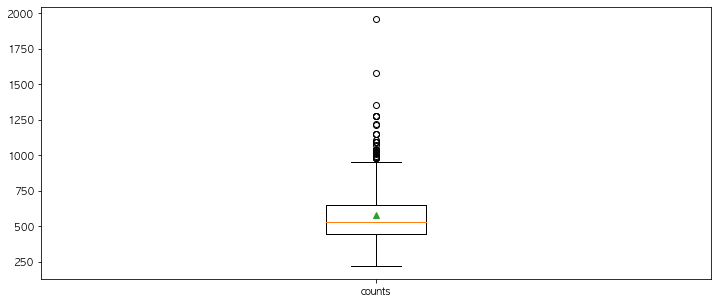

In [171]:
plt.figure(figsize=(12,5))
# 박스 플롯 생성
# 첫 번째 파라미터: 여러 분포에 대한 데이터 리스트를 입력
# labels : 입력학 데이터에 대한 라벨
# showmeans : 평균값을 마크함

plt.boxplot(train_length, labels=['counts'], showmeans=True)
plt.show()

In [172]:
train_lyric=[lyric for lyric in emotion_lyrics.가사 if type(lyric) is str]

In [173]:
from wordcloud import WordCloud

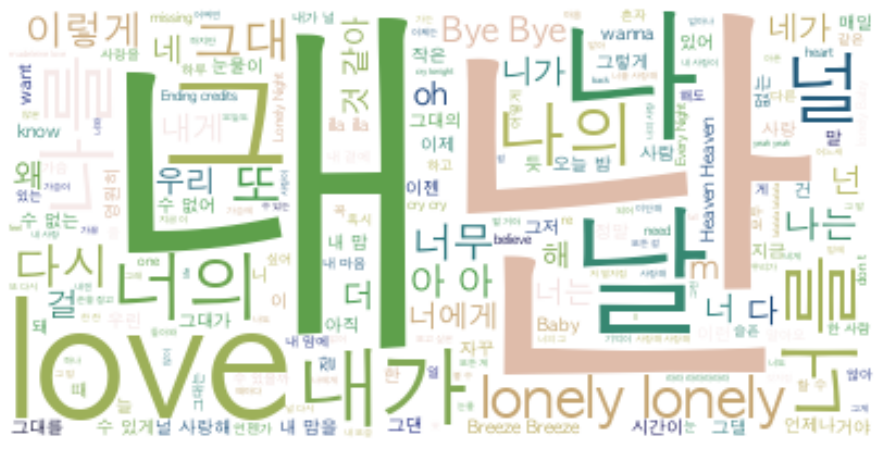

In [174]:
wordcloud=WordCloud(
    background_color='White',
    colormap= 'gist_earth',
    relative_scaling=0.8,
    font_path="AppleGothic" 
).generate(' '.join(train_lyric))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [175]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [176]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

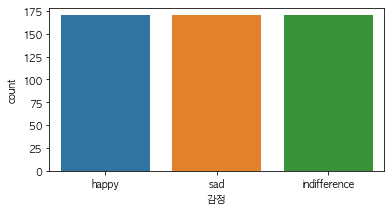

In [177]:
fig, axe=plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(emotion_lyrics.감정)
plt.show()

In [196]:
train_lyric[0]

'Can you hear the crystal melody with a small hint of misery Life sometimes promises warmth tomorrow Just like a dusky sunset in splendor I remember the humming sound is passing by The tears we have held back all the dreams that I have lost in the Precious days Just keep on dreaming and dreaming alone in the faded paradise your heart that is lighting up the world Takes me to the beautiful dawn Can you see the place I used to stay waiting for you to call me Life sometimes becomes a shining starlight gazing at you make my heart more flutter Just keep on dreaming and dreaming don’t you fold your wings in doubt Each piece of precious memory They will make you fly away I will be there in your memory sweet sweet dreams my dear '

In [178]:
import re
import numpy as np
from konlpy.tag import Okt
from sklearn import preprocessing
import tensorflow

In [197]:
okt = Okt()

In [285]:
train_lyric[170]

' 살아도 사는 게 아니래 너 없는 하늘에 창 없는 감옥 같아서 웃어도 웃는 게 아니래 초라해 보이고 우는 것 같아 보인대 사랑해도 말 못 했던 나 내색조차 할 수 없던 나 나 잠이 드는 순간조차 그리웠었지 살다가 살다가 살다가 너 힘들 때 나로 인한 슬픔으로 후련할 때까지 울다가 울다가 울다가 너 지칠 때 정 힘들면 단 한 번만 기억하겠니 살다가 웃어도 웃는 게 아니래 초라해 보이고 우는 것 같아 보인대 사랑해도 말 못 했던 나 내색조차 할 수 없던 나 나 잠이 드는 순간조차 그리웠었지 살다가 살다가 살다가 너 힘들 때 나로 인한 슬픔으로 후련할 때까지 울다가 울다가 울다가 너 지칠 때 정 힘들면 단 한 번만 기억하겠니 우린 마지못해 웃는 거겠지 우린 마지못해 살아가겠지 내 곁에 있어도 나의 곁에 있어도 눈물나니까 살다가 살다가 살다가 너 힘들 때 나로 인한 슬픔으로 후련할 때까지 태워도 태워도 태워도 남았다면 남김없이 태워도 돼 후련할 때까지 나 살다가 나 살다가  '

In [295]:
lyric_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ+]","",train_lyric[170],count=1,flags=0)

In [296]:
lyric_text

'살아도 사는 게 아니래 너 없는 하늘에 창 없는 감옥 같아서 웃어도 웃는 게 아니래 초라해 보이고 우는 것 같아 보인대 사랑해도 말 못 했던 나 내색조차 할 수 없던 나 나 잠이 드는 순간조차 그리웠었지 살다가 살다가 살다가 너 힘들 때 나로 인한 슬픔으로 후련할 때까지 울다가 울다가 울다가 너 지칠 때 정 힘들면 단 한 번만 기억하겠니 살다가 웃어도 웃는 게 아니래 초라해 보이고 우는 것 같아 보인대 사랑해도 말 못 했던 나 내색조차 할 수 없던 나 나 잠이 드는 순간조차 그리웠었지 살다가 살다가 살다가 너 힘들 때 나로 인한 슬픔으로 후련할 때까지 울다가 울다가 울다가 너 지칠 때 정 힘들면 단 한 번만 기억하겠니 우린 마지못해 웃는 거겠지 우린 마지못해 살아가겠지 내 곁에 있어도 나의 곁에 있어도 눈물나니까 살다가 살다가 살다가 너 힘들 때 나로 인한 슬픔으로 후련할 때까지 태워도 태워도 태워도 남았다면 남김없이 태워도 돼 후련할 때까지 나 살다가 나 살다가  '

In [297]:
lyric_text = okt.morphs(lyric_text)
print(lyric_text)

['살아도', '사는', '게', '아니래', '너', '없는', '하늘', '에', '창', '없는', '감옥', '같아서', '웃어도', '웃는', '게', '아니래', '초라해', '보이', '고', '우는', '것', '같아', '보인대', '사랑', '해도', '말', '못', '했던', '나', '내색', '조차', '할', '수', '없던', '나', '나', '잠', '이', '드는', '순간', '조차', '그리웠었지', '살다가', '살다가', '살다가', '너', '힘들', '때', '나로', '인한', '슬픔', '으로', '후련할', '때', '까지', '울', '다가', '울', '다가', '울', '다가', '너', '지칠', '때', '정', '힘들면', '단', '한', '번만', '기억', '하겠니', '살다가', '웃어도', '웃는', '게', '아니래', '초라해', '보이', '고', '우는', '것', '같아', '보인대', '사랑', '해도', '말', '못', '했던', '나', '내색', '조차', '할', '수', '없던', '나', '나', '잠', '이', '드는', '순간', '조차', '그리웠었지', '살다가', '살다가', '살다가', '너', '힘들', '때', '나로', '인한', '슬픔', '으로', '후련할', '때', '까지', '울', '다가', '울', '다가', '울', '다가', '너', '지칠', '때', '정', '힘들면', '단', '한', '번만', '기억', '하겠니', '우린', '마지못해', '웃는', '거', '겠지', '우린', '마지못해', '살아가겠지', '내', '곁', '에', '있어도', '나', '의', '곁', '에', '있어도', '눈물나니까', '살다가', '살다가', '살다가', '너', '힘들', '때', '나로', '인한', '슬픔', '으로', '후련할', '때', '까지', '태워도', '태워도', '태워도', '남았다면', '남김없이', '태워도'

In [303]:
stop_words=set(['게','아니래','에','보이','고','이','드는','때','돼','조차','울','다가','단','한',\
                '번만','으로','했던','하겠니','것','의','할','수','까지','못','나로'])
clean_lyric=[token for token in lyric_text if not token in stop_words]

print(clean_lyric)

['살아도', '사는', '너', '없는', '하늘', '창', '없는', '감옥', '같아서', '웃어도', '웃는', '초라해', '우는', '같아', '보인대', '사랑', '해도', '말', '나', '내색', '없던', '나', '나', '잠', '순간', '그리웠었지', '살다가', '살다가', '살다가', '너', '힘들', '인한', '슬픔', '후련할', '너', '지칠', '정', '힘들면', '기억', '살다가', '웃어도', '웃는', '초라해', '우는', '같아', '보인대', '사랑', '해도', '말', '나', '내색', '없던', '나', '나', '잠', '순간', '그리웠었지', '살다가', '살다가', '살다가', '너', '힘들', '인한', '슬픔', '후련할', '너', '지칠', '정', '힘들면', '기억', '우린', '마지못해', '웃는', '거', '겠지', '우린', '마지못해', '살아가겠지', '내', '곁', '있어도', '나', '곁', '있어도', '눈물나니까', '살다가', '살다가', '살다가', '너', '힘들', '인한', '슬픔', '후련할', '태워도', '태워도', '태워도', '남았다면', '남김없이', '태워도', '후련할', '나', '살다가', '나', '살다가']


In [304]:
def preprocessing(lyric,okt,remove_stopwords = False,stop_words=[]):
    lyrics_text = re.sub("[^가-힇ㄱ-ㅎㅏ-ㅣ+]","",lyric)
    lyrics_text1 = okt.morphs(lyrics_text,stem=True)
    if remove_stopwords:

        stop_words=set(['은','잘','반가','움','에','가','스럽던','새우','곤','참','시','의',\
                '아','의','그','를','도기','들참','이란','걸알','까','서','랑','되','할거니',\
                '시너','대로사','뭐','을','고기','에서','있죠우리','이','적','했고','와','이',\
                '같이','였단','을지','오래된것','보여인사','너','살','다가','도나','나나','울','인한',\
                '으로','돼','까지','이드','는','고','보이','말못','겠지','때','한','번만','단','까지나',\
                '때정','나로'])
        clean_lyrics = [token for token in lyrics_text1 if not token in stop_words]
    return clean_lyrics

In [305]:
test = []
for lyric in train_lyric:
    if type(lyric) == str:
        test.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        test.append([])

In [319]:
test

[['대의',
  '눈물',
  '이마',
  '우리',
  '사랑',
  '보다',
  '없다',
  '이제야',
  '나',
  '알다',
  '날',
  '사랑',
  '하다',
  '그대',
  '이미',
  '없다',
  '세월',
  '지나다',
  '변하다',
  '않다',
  '밤',
  '지나다',
  '젠',
  '안녕',
  '영원',
  '대의',
  '아픔',
  '도',
  '눈물',
  '도',
  '슬프다',
  '상처',
  '도',
  '내',
  '갖다',
  '약속',
  '들',
  '잊다',
  '않다',
  '울다',
  '토록',
  '사랑',
  '하다',
  '젠',
  '안녕',
  '천천',
  '그리고',
  '영원',
  '세월',
  '지나다',
  '변하다',
  '않다',
  '밤',
  '지나다',
  '젠',
  '안녕',
  '영원',
  '세월',
  '지나다',
  '변하다',
  '않다',
  '밤',
  '지나다',
  '젠',
  '안녕',
  '영원',
  '널',
  '사랑',
  '해널',
  '사랑',
  '해',
  '영원',
  '널',
  '사랑',
  '해널',
  '사랑',
  '해널',
  '사랑',
  '해',
  '언제나',
  '영원',
  '널',
  '사랑',
  '해널',
  '사랑',
  '해널',
  '사랑',
  '해',
  '언제나',
  '영원',
  '널',
  '사랑',
  '해널',
  '사랑',
  '해널',
  '사랑',
  '해',
  '언제나',
  '영원',
  '널',
  '사랑',
  '해널',
  '사랑',
  '해널',
  '사랑',
  '해'],
 ['안경',
  '너머',
  '보이다',
  '흐릿',
  '한세상',
  '꼭',
  '나',
  '같다',
  '밤새다',
  '써다',
  '내리다',
  '노래',
  '타다',
  '나방',
  '같다',
  '작은방',
  '별하나',
  '꺼',
  '지면',
  '내'

In [320]:
len(test)

509

In [321]:
import nltk

In [322]:
for i in test:
    ko = nltk.Text(i)
ko.vocab().most_common(100)

[('무엇', 6),
 ('내', 6),
 ('곳', 5),
 ('하', 4),
 ('않다', 4),
 ('없다', 3),
 ('들', 3),
 ('뒤늦다', 3),
 ('더', 3),
 ('보태', 3),
 ('려', 3),
 ('나귀', 3),
 ('기울이다', 3),
 ('듣다', 3),
 ('달리', 3),
 ('보다', 3),
 ('만인', 3),
 ('것', 3),
 ('못', 3),
 ('그린', 3),
 ('내빈', 3),
 ('채우다', 3),
 ('차라리', 3),
 ('마음', 3),
 ('비치다', 3),
 ('모습', 3),
 ('그리다', 3),
 ('알다', 2),
 ('이제', 2),
 ('붙들다', 1),
 ('꿈', 1),
 ('조각', 1),
 ('하나', 1),
 ('둘', 1),
 ('사라지다', 1),
 ('쳇바퀴', 1),
 ('돌다', 1),
 ('끝', 1),
 ('방황', 1),
 ('오늘', 1),
 ('도매', 1),
 ('달려가다', 1),
 ('거짓', 1),
 ('인', 1),
 ('줄', 1),
 ('겉', 1),
 ('으론', 1),
 ('감추다', 1),
 ('한숨', 1),
 ('섞이다', 1),
 ('한마디', 1),
 ('에나', 1),
 ('만의', 1),
 ('진실', 1),
 ('담기다', 1),
 ('제', 1),
 ('엇갈리다', 1),
 ('속', 1),
 ('기다', 1),
 ('잠', 1),
 ('깨다', 1),
 ('주위', 1),
 ('엔', 1),
 ('아무', 1),
 ('도', 1),
 ('묻다', 1),
 ('에가', 1),
 ('려고', 1),
 ('네', 1),
 ('근심', 1),
 ('쌓이다', 1),
 ('순간', 1),
 ('겹', 1),
 ('게', 1),
 ('보내다', 1),
 ('버리다', 1),
 ('기억', 1),
 ('생각', 1),
 ('해내다', 1),
 ('또', 1),
 ('잊어버리다', 1)]

In [323]:
token_sum = list(ko.vocab())

In [324]:
from tensorflow import keras

In [325]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result = []
lines = train_lyric
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if not word[1] in ["Josa","Eomi","Puntuation"]:
            if word[0] != "n":
                r.append(word[0])
    rl = (" ".join(r).strip())
    
    okt_result.append(rl)

In [326]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [327]:
print((encoded[1]))

[27, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 35, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 29, 56, 0, 0, 12, 0, 28, 0, 0, 0, 0, 35, 0, 0, 33, 0, 0, 27, 0, 0, 29, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 33, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 12, 0, 0, 29, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0, 27, 0, 0, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 58, 0, 7, 0, 81, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 29, 0, 35, 0, 0, 33, 0, 0, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 33, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 12, 0, 0, 29, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12

가사의 최대 길이 : 1950
가사의 최소 길이 : 180
가사의 평균 길이 : 548.731373


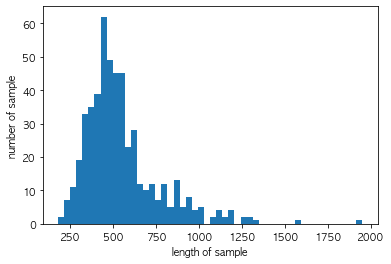

In [328]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [329]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=max_length, padding='post')
padding_paragraphs_encoding

array([[ 0,  0,  0, ...,  0,  0,  0],
       [27,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [64,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [30,  7,  0, ...,  0,  0,  0]], dtype=int32)

In [330]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

510 1950


In [334]:
# 분류항목(food,sports)를 수치로 변경하기
categories = emotion_lyrics['감정'].to_list()

def category_encode(category):
    if category == 'happy':
        return [1,0,0]
    elif category == 'sad':
        return [0,1,0]
    else:
        return [0,0,1]

In [335]:
encoded_category = [category_encode(category) for category in categories]
encoded_category

[[1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1,

In [336]:
len(encoded_category)

510

In [337]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [338]:
# train val data 만들기
trainData, valData, trainTarget, valTarget = train_test_split(
    train_input, train_target, test_size=0.2
)

In [360]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.Embedding(vocab_size,5,input_length=max_length)) 
# one hot encoding 만드는 애
# Embedding(중복 없는 전체 단어 갯수,index,가장 간 문장의 단어 갯수 )
# 임베딩 레이어는 인덱스를 받아 5차원 벡터의 임베딩을 출력합니다.
model.add(keras.layers.LSTM(128))

# 분류 단계
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))

In [361]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [362]:
import numpy as np
# train_X = np.array(padding_paragraphs_encoding)
# train_Y = np.array(encoded_category)

In [363]:
train_x = np.array(train_input)
train_y = np.array(train_target)

In [364]:
val_x = np.array(valData)
val_y = np.array(valTarget)

In [365]:
history = model.fit(
    train_x,
    train_y,
    epochs=100,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (val_x, val_y),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
13/13 [==============================] - 25s 2s/step - loss: 1.0994 - accuracy: 0.3113 - val_loss: 1.0983 - val_accuracy: 0.3537
Epoch 2/100
13/13 [==============================] - 20s 2s/step - loss: 1.0992 - accuracy: 0.3309 - val_loss: 1.0986 - val_accuracy: 0.3293
Epoch 3/100
13/13 [==============================] - 21s 2s/step - loss: 1.0987 - accuracy: 0.3407 - val_loss: 1.0987 - val_accuracy: 0.3293
Epoch 4/100
13/13 [==============================] - 21s 2s/step - loss: 1.0991 - accuracy: 0.3407 - val_loss: 1.0987 - val_accuracy: 0.3293
Epoch 5/100
13/13 [==============================] - 21s 2s/step - loss: 1.0991 - accuracy: 0.3407 - val_loss: 1.0991 - val_accuracy: 0.3293
Epoch 6/100
13/13 [==============================] - 21s 2s/step - loss: 1.0987 - accuracy: 0.3407 - val_loss: 1.0989 - val_accuracy: 0.3293
Epoch 7/100
13/13 [==============================] - 21s 2s/step - loss: 1.0988 - accuracy: 0.3407 - val_loss: 1.0989 - val_accuracy: 0.3293
Epoch 8/100
1

In [366]:
print("accuracy :" , np.mean(history.history['accuracy']))
print("val_accuracy :" , np.mean(history.history['val_accuracy']))

accuracy : 0.34029410481452943
val_accuracy : 0.32951220870018005


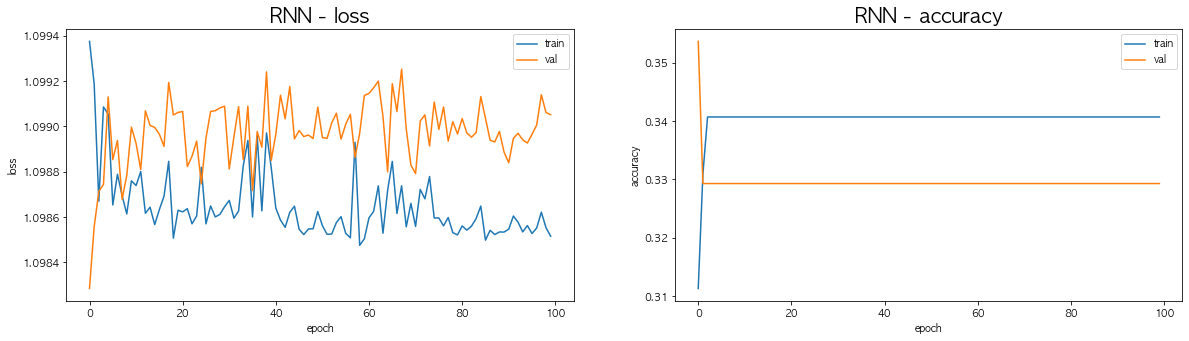

In [367]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("RNN - loss", size=20)
ax2.set_title("RNN - accuracy", size=20)
plt.show()

In [368]:
test_result = []
test_result.append(model.predict(test_input))

4/4 [==============================] - 1s 242ms/step


In [370]:
result = []
for i in range(0,102):    
    result.append(test_result[0][i])

In [372]:
test_result[0][101]

array([0.33150014, 0.34041172, 0.32808816], dtype=float32)

In [373]:
result[0:10]

[array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32),
 array([0.33150014, 0.34041172, 0.32808816], dtype=float32)]